In [2]:
using PowerSystems
using Dates
using TimeSeries

In [3]:
system = System(100.0);

In [4]:
 bus1 = ACBus(;
           number = 1,
           name = "bus1",
           bustype = ACBusTypes.REF,
           angle = 0.0,
           magnitude = 1.0,
           voltage_limits = (min = 0.9, max = 1.05),
           base_voltage = 230.0,
       );

In [6]:
wind1 = RenewableDispatch(;
           name = "wind1",
           available = true,
           bus = bus1,
           active_power = 0.0, # Per-unitized by device base_power
           reactive_power = 0.0, # Per-unitized by device base_power
           rating = 1.0, # 10 MW per-unitized by device base_power
           prime_mover_type = PrimeMovers.WT,
           reactive_power_limits = (min = 0.0, max = 0.0), # per-unitized by device base_power
           power_factor = 1.0,
           operation_cost = RenewableGenerationCost(nothing),
           base_power = 10.0, # MVA
       );

In [7]:
load1 = PowerLoad(;
           name = "load1",
           available = true,
           bus = bus1,
           active_power = 0.0, # Per-unitized by device base_power
           reactive_power = 0.0, # Per-unitized by device base_power
           base_power = 10.0, # MVA
           max_active_power = 1.0, # 10 MW per-unitized by device base_power
           max_reactive_power = 0.0,
       );

In [8]:
load2 = PowerLoad(;
           name = "load2",
           available = true,
           bus = bus1,
           active_power = 0.0, # Per-unitized by device base_power
           reactive_power = 0.0, # Per-unitized by device base_power
           base_power = 30.0, # MVA
           max_active_power = 1.0, # 10 MW per-unitized by device base_power
           max_reactive_power = 0.0,
       );

In [9]:
add_components!(system, [bus1, wind1, load1, load2])

In [43]:
set_units_base_system!(system, "NATURAL_UNITS")

[ Info: Unit System changed to UnitSystem.NATURAL_UNITS = 2


Add TS data

In [10]:
wind_values = [6.0, 7, 7, 6, 7, 9, 9, 9, 8, 8, 7, 6, 5, 5, 5, 5, 5, 6, 6, 6, 7, 6, 7, 7];
resolution = Dates.Minute(5);
timestamps = range(DateTime("2020-01-01T08:00:00"); step = resolution, length = 24);
wind_timearray = TimeArray(timestamps, wind_values);
wind_time_series = SingleTimeSeries(;
           name = "max_active_power",
           data = wind_timearray,
       );

In [11]:
add_time_series!(system, wind1, wind_time_series);

In [15]:
show_time_series(wind1)


┌──────────────────┬──────────────────┬─────────────────────┬─────────────────────┬────────┬─────────────────────┐
│ time_series_type │             name │   initial_timestamp │          resolution │ length │            features │
│           String │           String │            DateTime │         Millisecond │  Int64 │   Dict{String, Any} │
├──────────────────┼──────────────────┼─────────────────────┼─────────────────────┼────────┼─────────────────────┤
│ SingleTimeSeries │ max_active_power │ 2020-01-01T08:00:00 │ 300000 milliseconds │     24 │ Dict{String, Any}() │
└──────────────────┴──────────────────┴─────────────────────┴─────────────────────┴────────┴─────────────────────┘


In [18]:
# Check what time series related functions are available
println("PowerSystems functions containing 'time_series':")
for name in names(PowerSystems)
    if occursin("time_series", string(name)) || occursin("Time", string(name))
        println("  ", name)
    end
end

PowerSystems functions containing 'time_series':
  DeterministicSingleTimeSeries
  SingleTimeSeries
  StaticTimeSeries
  StaticTimeSeriesCache
  StaticTimeSeriesKey
  TimeSeriesAssociation
  TimeSeriesCounts
  TimeSeriesData
  TimeSeriesForcedOutage
  TimeSeriesKey
  add_time_series!
  begin_time_series_update
  bulk_add_time_series!
  check_time_series_consistency
  clear_time_series!
  copy_subcomponent_time_series!
  copy_time_series!
  get_next_time_series_array!
  get_static_time_series_summary_table
  get_time_series
  get_time_series_array
  get_time_series_counts
  get_time_series_keys
  get_time_series_multiple
  get_time_series_resolutions
  get_time_series_timestamps
  get_time_series_type
  get_time_series_values
  has_time_series
  open_time_series_store!
  remove_time_series!
  show_time_series
  supports_time_series
  transform_single_time_series!


In [17]:
get_time_series_array(SingleTimeSeries, wind1, "max_active_power")

24×1 TimeArray{Float64, 1, DateTime, Vector{Float64}} 2020-01-01T08:00:00 to 2020-01-01T09:55:00
┌─────────────────────┬─────┐
│                     │ A   │
├─────────────────────┼─────┤
│ 2020-01-01T08:00:00 │ 6.0 │
│ 2020-01-01T08:05:00 │ 7.0 │
│ 2020-01-01T08:10:00 │ 7.0 │
│ 2020-01-01T08:15:00 │ 6.0 │
│ 2020-01-01T08:20:00 │ 7.0 │
│ 2020-01-01T08:25:00 │ 9.0 │
│ 2020-01-01T08:30:00 │ 9.0 │
│ 2020-01-01T08:35:00 │ 9.0 │
│ 2020-01-01T08:40:00 │ 8.0 │
│ 2020-01-01T08:45:00 │ 8.0 │
│ 2020-01-01T08:50:00 │ 7.0 │
│          ⋮          │  ⋮  │
│ 2020-01-01T09:10:00 │ 5.0 │
│ 2020-01-01T09:15:00 │ 5.0 │
│ 2020-01-01T09:20:00 │ 5.0 │
│ 2020-01-01T09:25:00 │ 6.0 │
│ 2020-01-01T09:30:00 │ 6.0 │
│ 2020-01-01T09:35:00 │ 6.0 │
│ 2020-01-01T09:40:00 │ 7.0 │
│ 2020-01-01T09:45:00 │ 6.0 │
│ 2020-01-01T09:50:00 │ 7.0 │
│ 2020-01-01T09:55:00 │ 7.0 │
└─────────────────────┴─────┘
               3 rows omitted

Adding a forecast

In [19]:
wind_forecast_data = Dict(
           DateTime("2020-01-01T08:00:00") => [5.0, 6, 7, 7, 7, 8, 9, 10, 10, 9, 7, 5],
           DateTime("2020-01-01T08:30:00") => [9.0, 9, 9, 9, 8, 7, 6, 5, 4, 5, 4, 4],
           DateTime("2020-01-01T09:00:00") => [6.0, 6, 5, 5, 4, 5, 6, 7, 7, 7, 6, 6],
       );

In [ ]:
wind_forecast = Deterministic("max_active_power", wind_forecast_data, resolution);
add_time_series!(system, wind1, wind_forecast);


In [23]:
show_time_series(wind1)

┌──────────────────┬──────────────────┬─────────────────────┬─────────────────────┬────────┬─────────────────────┐
│ time_series_type │             name │   initial_timestamp │          resolution │ length │            features │
│           String │           String │            DateTime │         Millisecond │  Int64 │   Dict{String, Any} │
├──────────────────┼──────────────────┼─────────────────────┼─────────────────────┼────────┼─────────────────────┤
│ SingleTimeSeries │ max_active_power │ 2020-01-01T08:00:00 │ 300000 milliseconds │     24 │ Dict{String, Any}() │
└──────────────────┴──────────────────┴─────────────────────┴─────────────────────┴────────┴─────────────────────┘
┌──────────────────┬──────────────────┬─────────────────────┬────────────┬────────────┬──────────────────────┬───────┬─────────────────────┐
│ time_series_type │             name │   initial_timestamp │ resolution │    horizon │             interval │ count │            features │
│           String │        

In [44]:
get_time_series_array(
           Deterministic,
           wind1,
           "max_active_power";
           start_time = DateTime("2020-01-01T08:30:00"),
       )

12×1 TimeArray{Float64, 1, DateTime, SubArray{Float64, 1, Vector{Float64}, Tuple{UnitRange{Int64}}, true}} 2020-01-01T08:30:00 to 2020-01-01T09:25:00
┌─────────────────────┬─────┐
│                     │ A   │
├─────────────────────┼─────┤
│ 2020-01-01T08:30:00 │ 9.0 │
│ 2020-01-01T08:35:00 │ 9.0 │
│ 2020-01-01T08:40:00 │ 9.0 │
│ 2020-01-01T08:45:00 │ 9.0 │
│ 2020-01-01T08:50:00 │ 8.0 │
│ 2020-01-01T08:55:00 │ 7.0 │
│ 2020-01-01T09:00:00 │ 6.0 │
│ 2020-01-01T09:05:00 │ 5.0 │
│ 2020-01-01T09:10:00 │ 4.0 │
│ 2020-01-01T09:15:00 │ 5.0 │
│ 2020-01-01T09:20:00 │ 4.0 │
│ 2020-01-01T09:25:00 │ 4.0 │
└─────────────────────┴─────┘

Load

In [25]:
load_values = [0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.6, 0.6,
           0.7, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8];

In [26]:
load_timearray = TimeArray(timestamps, load_values);

In [38]:
load_time_series = SingleTimeSeries(;
           name = "max_active_power",
           data = load_timearray,
           scaling_factor_multiplier = get_max_active_power,
       );

In [28]:
add_time_series!(system, [load1, load2], load_time_series);

In [48]:
ts_data = get_time_series_array(SingleTimeSeries, load2, "max_active_power") 

24×1 TimeArray{Float64, 1, DateTime, Vector{Float64}} 2020-01-01T08:00:00 to 2020-01-01T09:55:00
┌─────────────────────┬──────┐
│                     │ A    │
├─────────────────────┼──────┤
│ 2020-01-01T08:00:00 │  9.0 │
│ 2020-01-01T08:05:00 │  9.0 │
│ 2020-01-01T08:10:00 │  9.0 │
│ 2020-01-01T08:15:00 │  9.0 │
│ 2020-01-01T08:20:00 │ 12.0 │
│ 2020-01-01T08:25:00 │ 12.0 │
│ 2020-01-01T08:30:00 │ 12.0 │
│ 2020-01-01T08:35:00 │ 12.0 │
│ 2020-01-01T08:40:00 │ 15.0 │
│ 2020-01-01T08:45:00 │ 15.0 │
│ 2020-01-01T08:50:00 │ 18.0 │
│          ⋮          │  ⋮   │
│ 2020-01-01T09:10:00 │ 24.0 │
│ 2020-01-01T09:15:00 │ 24.0 │
│ 2020-01-01T09:20:00 │ 24.0 │
│ 2020-01-01T09:25:00 │ 24.0 │
│ 2020-01-01T09:30:00 │ 27.0 │
│ 2020-01-01T09:35:00 │ 24.0 │
│ 2020-01-01T09:40:00 │ 24.0 │
│ 2020-01-01T09:45:00 │ 24.0 │
│ 2020-01-01T09:50:00 │ 24.0 │
│ 2020-01-01T09:55:00 │ 24.0 │
└─────────────────────┴──────┘
                3 rows omitted

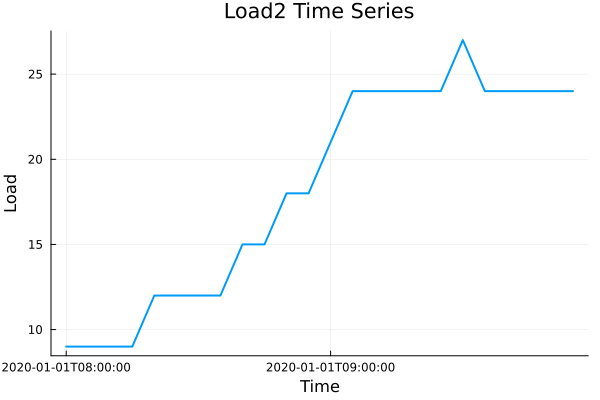

In [50]:
plot(ts_data, 
     title = "Load2 Time Series", 
     xlabel = "Time", 
     ylabel = "Load",
     linewidth = 2,
     legend = false)

In [51]:
transform_single_time_series!(
           system,
           Dates.Hour(1), # horizon
           Dates.Minute(30), # interval
       );

In [54]:
load1

PowerLoad: load1:
   name: load1
   available: true
   bus: ACBus: bus1
   active_power: 0.0
   reactive_power: 0.0
   base_power: 10.0
   max_active_power: 10.0
   max_reactive_power: 0.0
   services: 0-element Vector{Service}
   dynamic_injector: nothing
   ext: Dict{String, Any}()
   InfrastructureSystems.SystemUnitsSettings:
      base_value: 100.0
      unit_system: UnitSystem.NATURAL_UNITS = 2
   has_supplemental_attributes: false
   has_time_series: true

In [56]:
 get_time_series_array(
           DeterministicSingleTimeSeries,
           load1,
           "max_active_power";
           start_time = DateTime("2020-01-01T08:00:00"),
       )

12×1 TimeArray{Float64, 1, DateTime, Vector{Float64}} 2020-01-01T08:00:00 to 2020-01-01T08:55:00
┌─────────────────────┬─────┐
│                     │ A   │
├─────────────────────┼─────┤
│ 2020-01-01T08:00:00 │ 3.0 │
│ 2020-01-01T08:05:00 │ 3.0 │
│ 2020-01-01T08:10:00 │ 3.0 │
│ 2020-01-01T08:15:00 │ 3.0 │
│ 2020-01-01T08:20:00 │ 4.0 │
│ 2020-01-01T08:25:00 │ 4.0 │
│ 2020-01-01T08:30:00 │ 4.0 │
│ 2020-01-01T08:35:00 │ 4.0 │
│ 2020-01-01T08:40:00 │ 5.0 │
│ 2020-01-01T08:45:00 │ 5.0 │
│ 2020-01-01T08:50:00 │ 6.0 │
│ 2020-01-01T08:55:00 │ 6.0 │
└─────────────────────┴─────┘

In [61]:
 get_time_series_array(
           SingleTimeSeries,
           load1,
           "max_active_power";
       )

24×1 TimeArray{Float64, 1, DateTime, Vector{Float64}} 2020-01-01T08:00:00 to 2020-01-01T09:55:00
┌─────────────────────┬─────┐
│                     │ A   │
├─────────────────────┼─────┤
│ 2020-01-01T08:00:00 │ 3.0 │
│ 2020-01-01T08:05:00 │ 3.0 │
│ 2020-01-01T08:10:00 │ 3.0 │
│ 2020-01-01T08:15:00 │ 3.0 │
│ 2020-01-01T08:20:00 │ 4.0 │
│ 2020-01-01T08:25:00 │ 4.0 │
│ 2020-01-01T08:30:00 │ 4.0 │
│ 2020-01-01T08:35:00 │ 4.0 │
│ 2020-01-01T08:40:00 │ 5.0 │
│ 2020-01-01T08:45:00 │ 5.0 │
│ 2020-01-01T08:50:00 │ 6.0 │
│          ⋮          │  ⋮  │
│ 2020-01-01T09:10:00 │ 8.0 │
│ 2020-01-01T09:15:00 │ 8.0 │
│ 2020-01-01T09:20:00 │ 8.0 │
│ 2020-01-01T09:25:00 │ 8.0 │
│ 2020-01-01T09:30:00 │ 9.0 │
│ 2020-01-01T09:35:00 │ 8.0 │
│ 2020-01-01T09:40:00 │ 8.0 │
│ 2020-01-01T09:45:00 │ 8.0 │
│ 2020-01-01T09:50:00 │ 8.0 │
│ 2020-01-01T09:55:00 │ 8.0 │
└─────────────────────┴─────┘
               3 rows omitted

Sanity checks

In [62]:
system

Property,Value
Name,
Description,
System Units Base,NATURAL_UNITS
Base Power,100.0
Base Frequency,60.0
Num Components,4
Type,Count
ACBus,1
PowerLoad,2
RenewableDispatch,1


In [63]:
for g in get_components(x -> has_time_series(x), RenewableDispatch, system)
           remove_time_series!(system, DeterministicSingleTimeSeries, g, "max_active_power")
       end

In [64]:
system

Property,Value
Name,
Description,
System Units Base,NATURAL_UNITS
Base Power,100.0
Base Frequency,60.0
Num Components,4
Type,Count
ACBus,1
PowerLoad,2
RenewableDispatch,1


In [65]:
keys = get_time_series_keys(wind1)

2-element Vector{TimeSeriesKey}:
 ForecastKey(Deterministic, "max_active_power", DateTime("2020-01-01T08:00:00"), Minute(5), Minute(60), Millisecond(1800000), 3, Dict{String, Any}())
 StaticTimeSeriesKey(SingleTimeSeries, "max_active_power", DateTime("2020-01-01T08:00:00"), Millisecond(300000), 24, Dict{String, Any}())

In [67]:
forecast = get_time_series(wind1, keys[1])
for window in iterate_windows(forecast)
           @show values(maximum(window))
       end

values(maximum(window)) = [10.0]
values(maximum(window)) = [9.0]
values(maximum(window)) = [7.0]


In [68]:
get_max_active_power(wind1)

10.0